In [4]:
import keras #importing keras, the deep learning API
from keras.preprocessing.image import ImageDataGenerator #from pre-processing the image importing image data generator 
from keras.models import Sequential #importing sequential model from keras models as it is a linear stack of layers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization #importing the layers from keras layers. namely, 
# dense layer for implemeting operations, 
# dropout layers for randomly setting input units to 0, 
# activation later to apply an activation function to the output,
#  flatten layer to flatten the input as the name suggests 
# batch normalization layer is imported to automatically standardize the inputs and accelerate the training
from keras.layers import Conv2D, MaxPooling2D #conv2d layer is imported form keras layers to create a convolution kernal that is wind with layers input which helps to produce a tensor for outputs,
# Maxpooling2d layer downsamples the input by taking the maximum value 
import os #importing the os


num_classes=7  #total number of classes is referred by num_classes
img_rows,img_cols= 48,48 # image dimensions input
batch_size=28 #setting the parameter of batch size as 28

train_data_dir= 'train' #the mentioned directory will be used to train the neural network
validation_data_dir= 'validation' #to validate the trained data the mentioned directory will be used

train_dataGenerator= ImageDataGenerator( #to augment the images in real time image data generater is used which it is still training
                                  rescale=1./255,   #to transform every pixel value from range [0,255]->[0,1] rescale is being used 
                                  rotation_range=30, # initial degree of random rotations is set to 30
                                  shear_range=0.3, #counter-clock wise direction is set to 0.3 degrees
                                  zoom_range=0.3, # range for random zzoom is set to 0.3
                                  width_shift_range=0.4, # random elements from the array width shift is set to 0.4
                                  height_shift_range=0.3, # fraction of total height of random arrays is set to 0.3
                                  horizontal_flip=True, #it is a boolean to randomly flip the input image horizontally which is set to true
                                  vertical_flip=True, #boolean to randomly flip the image vertically is set to true
                                  fill_mode='nearest') #default fill mode is set to nearest
                                

validation_dataGenerator= ImageDataGenerator(rescale=1./255) #transforming everypixel value to validate the trained dataset from range [0,255]->[0,1] 


train_generator= train_dataGenerator.flow_from_directory( # A directory gives tuples of (x,y) where x is a numpy array having a lot of images which following parameters and y is numpy array of corresponding labels
                                                train_data_dir, #using the directory for training the neural network
                                                color_mode='grayscale', #setting the color to grayscale
                                                target_size=(img_rows,img_cols), # setting the dimensions for all images to be resized
                                                batch_size=batch_size, # setting the size of batches of data to the mentionsed size of 8
                                                class_mode='categorical', # categorical class mode is default and it will determine the type of label arrays that are returned
                                                shuffle=True) # shuffling the images is set to be true

validation_generator= validation_dataGenerator.flow_from_directory( # using validation directory to validate the data received after training
                                                validation_data_dir, # using the directory mentioned in the specific location above
                                                color_mode='grayscale', # setting the color mode to grayscale 
                                                target_size=(img_rows,img_cols), # all the resized images will have the dimensions of image rows and image columns mentioned above
                                                batch_size=batch_size, #again setting the batch siize to the earlier mentioned size of 8 batches
                                                class_mode='categorical', # class mode default which is categorical is set as class mode
                                                shuffle=True) # setting the shuffling of images to true


model = Sequential()  # Sequentional model is being used as it is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor


# BLOCK Number 1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1))) #adding the paramenters to the model in the block 1, using convolution 2d layers and setting the parameters
model.add(Activation('elu')) #using activation function elu which is exponential linear unit 
model.add(BatchNormalization()) # adding the batch normaisation layer to the model
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1))) # adding another convolution 2d layer to the model with specific parameters
model.add(Activation('elu')) # activating elu function in the model
model.add(BatchNormalization()) # adding another batch normalization layer
model.add(MaxPooling2D(pool_size=(2,2))) # the maxpooling 2d operation will downsample the input by taking the maximum value defined by pool size
model.add(Dropout(0.2)) # this layer will apply dropout to the input

#BLOCK Number 2

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal')) # Adding a conv2d layer to the block 2 model with parameters 
model.add(Activation('elu')) #activating the elu function in block 2 
model.add(BatchNormalization()) # setting batch normalization in block 2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal')) # adding another conv2d layer to the model with parameters 
model.add(Activation('elu')) #activating elu function another time
model.add(BatchNormalization()) # setting batch normalization layer
model.add(MaxPooling2D(pool_size=(2,2))) # setting maxpooling2d layer to block 2 
model.add(Dropout(0.2)) # this dropout layer will dropout the input

#BLOCK Number 3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal')) #Adding  A CONV2D LAYER to block number 3 with parameters
model.add(Activation('elu')) # elu function is used for activation
model.add(BatchNormalization()) # batch normalization setting up
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal')) # adding another layer of conv2d to the block 3
model.add(Activation('elu')) # another elu function in block 3
model.add(BatchNormalization()) # normaliztion of batch again in block 3
model.add(MaxPooling2D(pool_size=(2,2))) # adding a max pooling 2d layer to block 3
model.add(Dropout(0.2)) # using the dropout layer to dropout the input

# BLOCK Number 4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal')) # adding a conv2d layer to the block 4 
model.add(Activation('elu')) # activating elu function in block 4 
model.add(BatchNormalization()) # batchnormalization for block 4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal')) # adding another conv2d layer for block 4
model.add(Activation('elu')) # elu function is activated for block 4
model.add(BatchNormalization()) # another batch normalization for block 4
model.add(MaxPooling2D(pool_size=(2,2))) # setting up maxpooling 2d to mentioned values
model.add(Dropout(0.2)) # dropout used to dropout the input

# BLOCK Number 5 

model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal')) # adding a conv2d layer to the block 4 
model.add(Activation('elu')) # activating elu function in block 4 
model.add(BatchNormalization()) # batchnormalization for block 4
model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal')) # adding another conv2d layer for block 4
model.add(Activation('elu')) # elu function is activated for block 4
model.add(BatchNormalization()) # another batch normalization for block 4
model.add(MaxPooling2D(pool_size=(2,2))) # setting up maxpooling 2d to mentioned values
model.add(Dropout(0.2)) # dropout used to dropout the input

#BLOCK Number 6

model.add(Flatten()) #adding the flatten layer to block 5
model.add(Dense(64,kernel_initializer='he_normal')) # setting dense layer with parameters to block 5
model.add(Activation('elu')) #activating elu function to block 5
model.add(BatchNormalization()) # batch normalization for block 5
model.add(Dropout(0.5)) # dropout function for dropping out input off block 5

#BLOCK Number 7

model.add(Dense(64,kernel_initializer='he_normal')) # adding dense layer for block 6 with parameters 
model.add(Activation('elu')) # activation of elu function 
model.add(BatchNormalization()) # batchnormaliztion layer added ot block 6
model.add(Dropout(0.5)) # to dropout the input from block 6

#BLOCK Number 8

model.add(Dense(num_classes,kernel_initializer='he_normal')) # dense function is used for block number 7 
model.add(Activation('softmax')) #softmax function is used for block 7

print(model.summary()) # this function basically prints the model summary 

from keras.optimizers import RMSprop,SGD,Adam # importing rmsprop optimizer as it utilizes the magnitude of recent gradient to normalize the gradients 
# importing stochastic gradient descent optimizer or sgd because it is a method for optimizing an objective function with suitable smoothness properties
# importing adam optimizer as it is used to update network weights in training data
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau # importing model checkpoint as it is used in conjunction with training using model fit
# importing earlystopping callback as it allows to specify the performance measure to monitor and once trigered it stops the training process

checkpoint = ModelCheckpoint('Emotion_little_vgg.h5', # the checkpoint is set to the mentoned location
                             monitor='val_loss', # setting the validation lost function to monitor
                             mode='min', #mode is set to min
                             save_best_only=True, # saving the best accurate output
                             verbose=1) # setting verbose to 1

earlystop = EarlyStopping(monitor='val_loss', # in early stop function monitor is set to validation of loss function for cross validation 
                          min_delta=0, # minimum change in the quantity is set to 0
                          patience=3, # setting the patience to 3
                          verbose=1, # setting verbosity mode to 1
                          restore_best_weights=True # set true to restore best value
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # quantity to be monitored is set to val_loss 
                              factor=0.2, # the learning rate will be reduced by 20%
                              patience=3, # patience is set to 3
                              verbose=1, # verbose is set to 1
                              min_delta=0.0001) # threshold for measuring new optimum is set to 0.0001


callbacks = [earlystop,checkpoint,reduce_lr] # call back as mentioned above


model.compile(loss='categorical_crossentropy', # compiling the model with loss set to categorical crossentropy
              optimizer = Adam(lr=0.001), # optimizer set to adams optimizer
              metrics=['accuracy']) # and metrics is set to accuracy

nb_train_samples = 28821 # total training samples is mentioned 
nb_validation_samples = 7066 # total validation samples are mentioned 
epochs=100 # total epochs is set to 50

history=model.fit( # history is set to model.fit 
                train_generator, # data received after training 
                steps_per_epoch=nb_train_samples//batch_size, # mentioned speps required for the epoch
                epochs=epochs, # total epochs 
                callbacks=callbacks, # callbacks as mentioned above 
                validation_data=validation_generator, # validation data as validated above
                validation_steps=nb_validation_samples//batch_size)    # steps performed in the process of validating the data           

nv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_______________________

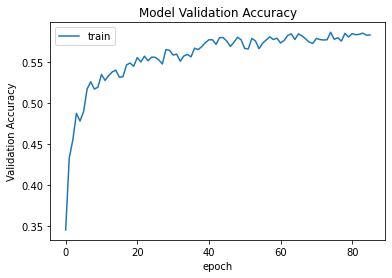

In [5]:
import matplotlib.pyplot as plt # importing mat plot library as it helps for graphical representation

plt.plot(history.history['val_accuracy']) # taking the value from the history of the training model for validation accuracy 
plt.title('Model Validation Accuracy') # giving the title name to the graph as model validation accuracy
plt.ylabel('Validation Accuracy') # labelling y axis as validation accuracy
plt.xlabel('epoch') # labelling x axis as epoch
plt.legend(['train'], loc='upper left') # giving a legend with train value line
plt.show() # showing the plotted graph

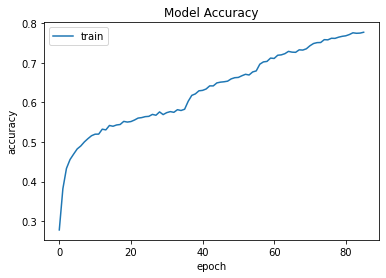

In [6]:
import matplotlib.pyplot as plt # importing mat plot library as it helps for graphical representation

plt.plot(history.history['accuracy']) # taking the value from the history of the training model for model accuracy 
plt.title('Model Accuracy') # giving the title name to the graph as model accuracy
plt.ylabel('accuracy') # labelling y axis as accuracy
plt.xlabel('epoch') # labelling x axis as epoch
plt.legend(['train'], loc='upper left') # giving a legend with train value line
plt.show() # showing the plotted graph

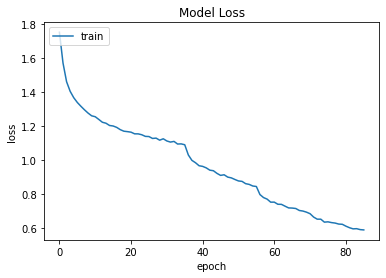

In [7]:
import matplotlib.pyplot as plt # importing mat plot library as it helps for graphical representation

plt.plot(history.history['loss']) # taking the value from the history of the training model for model loss
plt.title('Model Loss') # giving the title name to the graph as model loss
plt.ylabel('loss') # labelling y axis as loss
plt.xlabel('epoch') # labelling x axis as epoch
plt.legend(['train'], loc='upper left') # giving a legend with train value line
plt.show() # showing the plotted graph

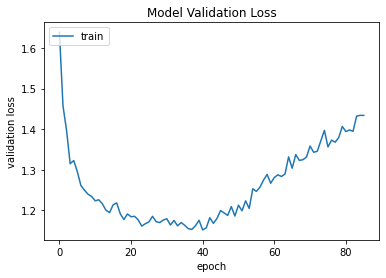

In [8]:
import matplotlib.pyplot as plt # importing mat plot library as it helps for graphical representation

plt.plot(history.history['val_loss']) # taking the value from the history of the training model for validation loss 
plt.title('Model Validation Loss') # giving the title name to the graph as model value loss
plt.ylabel('validation loss') # labelling y axis as value loss
plt.xlabel('epoch') # labelling x axis as epoch
plt.legend(['train'], loc='upper left') # giving a legend with train value line
plt.show() # showing the plotted graph

In [2]:
from keras.models import load_model # importing the model using load_model
from time import sleep # importing sleep from time as it takes a floating point number as an argument 
from keras.preprocessing.image import img_to_array # from keras pre processing image importing image to array function
from keras.preprocessing import image # from keras preprocessing importing image 
import cv2 # importing cv2 layer
import numpy as np # importing numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # for face classification using haarcascade xml file as it is loaded with object
classifier =load_model('Emotion_little_vgg.h5') # calling the trained and validated file of facial expressions 

class_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'] # defining the class  labels with 7 emotions 

cap = cv2.VideoCapture(0) # to capture the video using webcam, 0 is used in the command 



while True: # using the while loop with true variable
    #To take one frame off the video
    ret, frame = cap.read() # returning the frame which is captured and read by the camera
    labels = [] # labels are generated from the 
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # converting the color to gray using bgr to gray
    faces = face_classifier.detectMultiScale(gray,1.3,5) # detecting the face using face classfier from multiscale with parameters 

    for (x,y,w,h) in faces: # using for loop in faces
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) # setting the rectangle frame with color specified
        roi_gray = gray[y:y+h,x:x+w] # this will slice the gray array starting with y and x until their addition with h and w respectively
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA) # resizing the captured image and interpolating


        if np.sum([roi_gray])!=0: #setting the parameters for if statement of the required variable
            roi = roi_gray.astype('float')/255.0 # setting the type to float with respect to the size
            roi = img_to_array(roi) # using the image to array function with the variable
            roi = np.expand_dims(roi,axis=0) # axis along which to calculate weight norms is set to zero

        # The following code will allow the neural network to make a prediction based on the rectangular area of interest and then then lookup the in the class

            preds = classifier.predict(roi)[0] # to predict and classify the expression based on the class
            label=class_labels[preds.argmax()] # labels based on the class using the prediction argument
            label_position = (x,y) # position of the label with respect to x and y axis respectively
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3) # settind the color and size and font of the label which will apprear after the detection of the expression
        else: # else statement
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3) # if there is no face in the rectangular area of interest the label will show the mentioned
    cv2.imshow('Emotion Detector',frame) # the image show will display emotion detector 
    if cv2.waitKey(1) & 0xFF == ord('q'): # for the output using the waitkey for 1ms
        break # breaking the loop

cap.release() # releasing the capture
cv2.destroyAllWindows() # destroying all the windows